<a href="https://colab.research.google.com/github/lzyjo/deeplearning-lectures/blob/master/RunningLabSolsCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

**Changes**

* Saved extracted features to gdrive
* Moved extracted saved features from Gdrive to CWD so that they can be imported
* Trained model using CPU
* Trained model using GPU
* Test_single.py ran on /content/drive/MyDrive/LargestBbox_model_GPU_LabSols.pt - RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100352 and 25088x1024)
* Test_single ran on /content/drive/MyDrive/LargestBbox_model_GPU_LabSols_Suggested-model-architecture.pt - RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100352 and 25088x1024)



---



**Progress**

* Matrices do not mtach for multiplication for CPU trained model - RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100352 and 25088x1024)
  Check if the LABSOLS code matches original, as some changes were made to architecture + read the relevant portions of DLWPT to see how to turn the info from the workbook into architectire
* *Matrices do not mtach for multiplication for GPU trained model* (Untested) - RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100352 and 25088x1024)

 Check if the LABSOLS code matches original, as some changes were made to architecture + read the relevant portions of DLWPT to see how to turn the info from the workbook into architectire


https://teaching.pages.centralesupelec.fr/deeplearning-lectures-build/01-pytorch-object-detection.html

# Working directory and Data

In [1]:
pwd

'/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive at '/content/drive'

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/PyTorch Tutorial to Object Detection./VOCtrainval_11-May-2012.tar"  # Replace with the correct path

import tarfile

with tarfile.open(file_path, 'r') as tar:
    tar.extractall()
    print('Done')

Done


In [3]:
!git clone -b Original-GPU --single-branch https://github.com/lzyjo/deeplearning-lectures

#!git clone -b <branch> --single-branch <repo url>
#!git clone https://github.com/lzyjo/deeplearning-lectures

Cloning into 'deeplearning-lectures'...
remote: Enumerating objects: 3593, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 3593 (delta 64), reused 57 (delta 57), pack-reused 3514 (from 3)
Receiving objects: 100% (3593/3593), 105.88 MiB | 24.26 MiB/s, done.
Resolving deltas: 100% (2487/2487), done.


In [4]:
# prompt: move VOCdevkit folder into /content/a-PyTorch-Tutorial-to-Object-Detection-master

import shutil
import os

# Define the source and destination paths
source_path = "/content/VOCdevkit"  # Replace with the actual path to your VOCdevkit folder
destination_path = "/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection"

# Check if the source directory exists
if os.path.exists(source_path):
    try:
        # Use shutil.move to move the directory
        shutil.move(source_path, destination_path)
        print(f"Successfully moved '{source_path}' to '{destination_path}'")
    except Exception as e:
        print(f"Error moving directory: {e}")
else:
    print(f"Source directory '{source_path}' not found.")

Successfully moved '/content/VOCdevkit' to '/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection'


In [5]:
%cd /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection
#change cwd to appropriate one

#don't need this but maybe useful for other projects:
#!git clone https://github.com/lzyjo/a-PyTorch-Tutorial-to-Object-Detection.git #clone repo with all .py files

/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection


# Exploring the data

In [ ]:
import data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pprint

In [ ]:
# The datasets is already downloaded on the cluster
dataset_dir = "/content/deeplearning-lectures/Labs/01-pytorch-object-detection/VOC2012"
download = False

In [ ]:
# How do we preprocessing the image (e.g. none, crop, shrink)
image_transform_params = {'image_mode': 'none'}

In [ ]:
# How do we preprocess the targets
target_transform_params = {'target_mode': 'preprocessed'}

In [ ]:
# The post-processing of the image
image_transform = transforms.ToTensor()

In [ ]:
import torch
import torchvision.transforms as transforms
import data

image_transform = transforms.Compose([transforms.ToTensor(), imagenet_preprocessing])
train_dataset, valid_dataset = data.make_trainval_dataset(
        dataset_dir             = dataset_dir,
        image_transform_params  = image_transform_params,
        transform               = image_transform,
        target_transform_params = target_transform_params,
        download                = download)

print(train_dataset[0])

NameError: name 'imagenet_preprocessing' is not defined

In [ ]:
# Displaying an image
img, label = train_dataset[0]
img = np.transpose(img.numpy(), (1,2,0)) #rearranges the dimensions (axes)
                                          # of the image data. Images are often stored
                                          # with dimensions in the order (channels, height, width)
                                          # cahnged to be in the order (height, width, channels)

plt.figure()
plt.imshow(img)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

100%|██████████| 5717/5717 [00:44<00:00, 128.19it/s]


Bins : [111.  149.9 188.8 227.7 266.6 305.5 344.4 383.3 422.2 461.1 500. ]


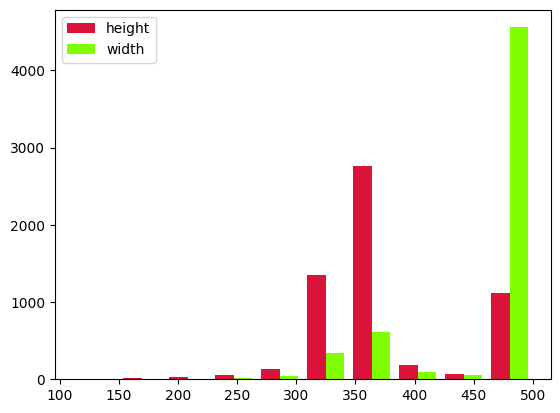

In [ ]:
# Getting the dimensions of the images
widths = []
heights = []


#count = 0
for img, label in tqdm.tqdm(train_dataset):
    heights.append(img.shape[1]) # Inside the loop,
                                #this line extracts the height of the image
                                 # (which is the second element of the img.shape tuple) and appends it to the
    # heights list.
    widths.append(img.shape[2])
    #count += 1
    #if (count >= 1000):
    #    break

sizes = np.zeros((len(widths), 2))
sizes[:,0] = heights #take all the values from the heights list and
                      #assign them to the first column (0) of all rows (: ) in the sizes array
sizes[:,1] = widths #take all the values from the widths list and
                      #assign them to the second column (1) of all rows (: ) in the sizes array

plt.figure()
n, bins, patches = plt.hist(sizes, 10, histtype='bar',
        color=['crimson', 'chartreuse'],
        label=['height', 'width'])
print("Bins : {}".format(bins))
plt.legend()
plt.savefig("histo_sizes.png", bbox_inches='tight')
plt.show()

In [ ]:
data.classes

['person',
 'bird',
 'cat',
 'cow',
 'dog',
 'horse',
 'sheep',
 'aeroplane',
 'bicycle',
 'boat',
 'bus',
 'car',
 'motorbike',
 'train',
 'bottle',
 'chair',
 'diningtable',
 'pottedplant',
 'sofa',
 'tvmonitor']

In [ ]:
# Counting the number of objects of each class
count = {k:0 for k in data.classes}
for img, label in tqdm.tqdm(train_dataset):
    for obj in label['annotation']['object']:
        count[obj['name']] += 1

pprint.pprint(count)

100%|██████████| 5717/5717 [00:52<00:00, 108.25it/s]

{'aeroplane': 470,
 'bicycle': 410,
 'bird': 592,
 'boat': 508,
 'bottle': 749,
 'bus': 317,
 'car': 1191,
 'cat': 609,
 'chair': 1457,
 'cow': 355,
 'diningtable': 373,
 'dog': 768,
 'horse': 377,
 'motorbike': 375,
 'person': 5019,
 'pottedplant': 557,
 'sheep': 509,
 'sofa': 399,
 'train': 327,
 'tvmonitor': 412}


# Largest object detection


## Pre-processing the images

In [ ]:
# External modules
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pprint
# Local modules
import data

In [ ]:
# The datasets is already downloaded on the cluster
dataset_dir = "/content/deeplearning-lectures/Labs/01-pytorch-object-detection/VOC2012"
download = True

In [ ]:
target_transform_params = {'target_mode': 'orig'}

In [ ]:
# The post-processing of the image
image_transform = None#transforms.ToTensor()

img_idx = 203

In [ ]:
# How do we preprocessing the image (e.g. none, crop, shrink)
image_transform_params = {'image_mode': 'none'}
train_dataset, valid_dataset = data.make_trainval_dataset(
    dataset_dir=dataset_dir,
    image_transform_params=image_transform_params,
    transform=image_transform,
    target_transform_params=target_transform_params,
    download=download)

img, target = train_dataset[img_idx]
print("The image from the dataset is of type {}".format(type(img)))

print("Saving an image as bird.jpeg")
img.save('bird.jpeg')

img = np.asarray(img)
print(img.shape)

image_transform_params = {'image_mode': 'shrink',
                          'output_image_size': {'width': 224, 'height': 224}}
train_dataset, valid_dataset = data.make_trainval_dataset(
    dataset_dir=dataset_dir,
    image_transform_params=image_transform_params,
    transform=image_transform,
    target_transform_params=target_transform_params,
    download=download)
shrink_img = np.asarray(train_dataset[img_idx][0])

image_transform_params = {'image_mode': 'crop',
                          'output_image_size': {'width': 224, 'height': 224}}
train_dataset, valid_dataset = data.make_trainval_dataset(
    dataset_dir=dataset_dir,
    image_transform_params=image_transform_params,
    transform=image_transform,
    target_transform_params=target_transform_params,
    download=download)
crop_img = np.asarray(train_dataset[img_idx][0])

  0%|          | 1.31M/2.00G [00:01<30:50, 1.08MB/s]


KeyboardInterrupt: 

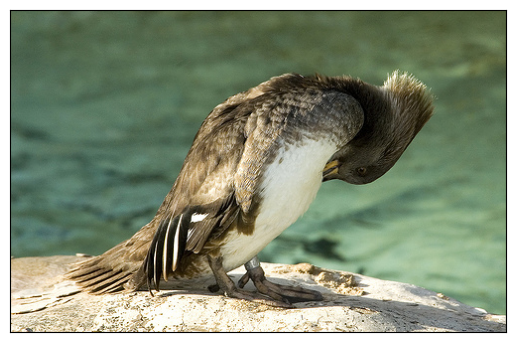

In [ ]:
plt.figure()
plt.imshow(img)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [ ]:
shrink_img.shape

(224, 224, 3)

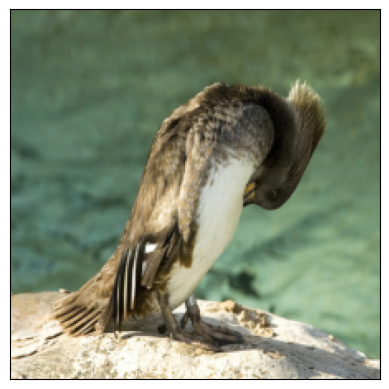

In [ ]:
plt.figure()
plt.imshow(shrink_img)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [ ]:
crop_img.shape

(224, 224, 3)

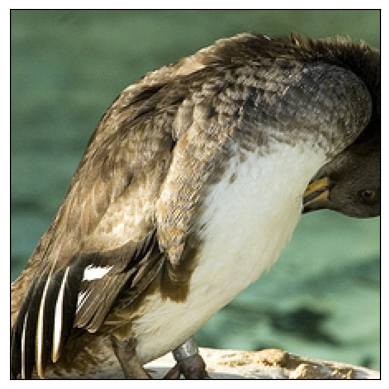

In [ ]:
plt.figure()
plt.imshow(crop_img)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

## Preprocessing the targets

In [ ]:
import data
import torch

objects = [{'bndbox': {'cx': 0.524, 'cy': 0.5735294117647058, 'width': 0.836, 'height': 0.753393665158371}, 'class': 5},
           {'bndbox': {'cx': 0.447, 'cy': 0.23868778280542988, 'width': 0.262, 'height': 0.27828054298642535}, 'class': 0}]

In [ ]:
largest_object = data.filter_largest(objects)
print(largest_object)

{'bndbox': {'cx': 0.524, 'cy': 0.5735294117647058, 'width': 0.836, 'height': 0.753393665158371}, 'class': 5}


In [ ]:
largest_object

{'bndbox': {'cx': 0.524,
  'cy': 0.5735294117647058,
  'width': 0.836,
  'height': 0.753393665158371},
 'class': 5}

In [ ]:
bboxes = torch.tensor([
  largest_object['bndbox']['cx'],
  largest_object['bndbox']['cy'],
  largest_object['bndbox']['width'],
  largest_object['bndbox']['height']
])

# Extract class label and convert to tensor
labels = torch.tensor([largest_object['class']])

tensor_target = {'bboxes': bboxes, 'labels': labels}

In [ ]:
target_tensor = data.target_to_tensor(largest_object)

In [ ]:
image_transform_params = {'image_mode': 'shrink',
                          'output_image_size': {'width':224, 'height':224}}
target_transform_params = {'target_mode': 'largest_bbox',
                           'image_transform_params': image_transform_params}

## Extracting the features with a pretrained model

### 002-extract.py


In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from collections import defaultdict
import sys
import utils

device = torch.device('cpu')
batch_size = 128
num_workers = 7

In [7]:
# The datasets is already downloaded on the cluster
dataset_dir = "/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t"
download = True

In [8]:
# How do we preprocessing the image (e.g. none, crop, shrink)
image_transform_params = {'image_mode': 'shrink', 'output_image_size': {'width':224, 'height':224}}

# How do we preprocess the targets
target_transform_params = {'target_mode': 'largest_bbox', 'image_transform_params': image_transform_params}

In [9]:
# The post-processing of the image

import data

image_transform = transforms.ToTensor()

imagenet_preprocessing = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225])

image_transform = transforms.Compose([transforms.ToTensor(), imagenet_preprocessing])

train_dataset, valid_dataset = data.make_trainval_dataset(
        dataset_dir             = dataset_dir,
        image_transform_params  = image_transform_params,
        transform               = image_transform,
        target_transform_params = target_transform_params,
        download                = download)

100%|██████████| 2.00G/2.00G [01:38<00:00, 20.3MB/s]


Extracting /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t/VOCtrainval_11-May-2012.tar to /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t
Using downloaded and verified file: /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t/VOCtrainval_11-May-2012.tar
Extracting /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t/VOCtrainval_11-May-2012.tar to /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
        batch_size=batch_size,
        shuffle = False,
        num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [11]:
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers)

In [12]:
# Check for existing model files
if os.path.exists("/content/drive/My Drive/train.pt") and os.path.exists("/content/drive/My Drive/valid.pt"):
  print("train.pt and valid.pt already exist in /content/drive/My Drive. Skipping code execution.")
else:
  model = torchvision.models.resnet18(pretrained=True)
  feature_extractor = nn.Sequential(*list(model.children())[:-2])
  device = torch.device('cpu') # If working with a CPU
  # device = torch.device('cuda') If working with the GPU
  feature_extractor.to(device)

train.pt and valid.pt already exist in /content/drive/My Drive. Skipping code execution.


In [13]:
# Check for existing model files
if os.path.exists("/content/drive/My Drive/train.pt") and os.path.exists("/content/drive/My Drive/valid.pt"):
  print("train.pt and valid.pt already exist in /content/drive/My Drive. Skipping code execution.")
else:
  utils.extract_save_features(train_loader, feature_extractor, device, 'train.pt')
  utils.extract_save_features(valid_loader, feature_extractor, device, 'valid.pt')

  import shutil

  # Copy train.pt to Google Drive
  shutil.copy('train.pt', '/content/drive/My Drive/train.pt')  # Change 'My Drive' to your desired folder

  # Copy valid.pt to Google Drive
  shutil.copy('valid.pt', '/content/drive/My Drive/valid.pt')  # Change 'My Drive' to your desired folder

  print("train.pt and valid.pt files uploaded to Google Drive!")

train.pt and valid.pt already exist in /content/drive/My Drive. Skipping code execution.


## Learning a classification and regression head from pretrained features

In [14]:
# train our predictor to output the bounding box and class
# of the largest object taking as input the features we just extracted.

import torch
from torch.utils.data import TensorDataset # In case you need it, you can build a dataset from
                                          # multiple tensors using TensorDataset

In [15]:
# prompt: move train.pt and valid.pt from drive to cwd

import shutil

# Move train.pt from Google Drive to current working directory
shutil.copy('/content/drive/My Drive/train.pt', './train.pt')
# In the context of file paths, a single dot (.) represents the current working directory (cwd).

# Move valid.pt from Google Drive to current working directory
shutil.copy('/content/drive/My Drive/valid.pt', './valid.pt')
# In the context of file paths, a single dot (.) represents the current working directory (cwd).

print("train.pt and valid.pt files moved to cwd!")

train.pt and valid.pt files moved to cwd!


In [16]:
# Load the extracted features
train_features = torch.load('train.pt')
valid_features = torch.load('valid.pt')

<ipython-input-16-c20b1b271036>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features = torch.load('train.pt')
<ipython-input-16-c20b1b271036>:3: FutureWarning: Yo

In [17]:
print(train_features.keys())

features_in_train = train_features['features']
targets_in_train = train_features['labels']

print(features_in_train.shape)
print(targets_in_train.shape)

dict_keys(['features', 'bboxes', 'labels'])
torch.Size([5717, 512, 7, 7])
torch.Size([5717])


In [18]:
print(valid_features.keys())

features_in_valid = valid_features['features']
targets_in_valid = valid_features['labels']

print(features_in_valid.shape)
print(targets_in_valid.shape)

dict_keys(['features', 'bboxes', 'labels'])
torch.Size([5823, 512, 7, 7])
torch.Size([5823])


In [19]:
train_x = features_in_train
train_y = targets_in_train
valid_x = features_in_valid
valid_y = targets_in_valid

# Create TensorDatasets (from pre-trained features)
train_dataset = TensorDataset(train_x, train_y)
valid_dataset = TensorDataset(valid_x, valid_y)

In [ ]:
one_batch = next(iter(train_loader))[0] # features, bbox, label, ..
num_features = one_batch[0].numel()
num_channels = one_batch[0].size()[0]
print("{} features, {} channels".format(num_features, num_channels))


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


150528 features, 3 channels


### Architecture


### Loss

### Training

In [21]:
# prompt: check if cuda is available

import torch

print(torch.cuda.is_available())

True


In [22]:
!python train.py --tensors . --num_workers 7 --use_gpu

2024-12-19 14:12:36.505024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 14:12:36.524023: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 14:12:36.530020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 14:12:36.546530: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 14:12:38.270693: W tensorflow/comp

In [23]:
# prompt: export /content/deeplearning-lectures/Labs/01-pytorch-object-detection/logs/largest_bbox_1/best_model.pt to google drive

from google.colab import drive

# Define source and destination paths
source_file = "/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/logs/largest_bbox_0/best_model.pt"
destination_file = "/content/drive/MyDrive/LargestBbox_model_GPU_LabSols_Suggested-model-architecture.pt"  # Change 'MyDrive' to your desired folder

import shutil
shutil.copy(source_file, destination_file)

'/content/drive/MyDrive/LargestBbox_model_GPU_LabSols_Suggested-model-architecture.pt'

## Testing

In [24]:
# prompt: move test_single from Labs to cwd

import shutil

# Define source and destination paths
source_file = "/content/deeplearning-lectures/Labs/01-pytorch-object-detection/test_single.py"
destination_file = "."

# Move the file
try:
    shutil.copy(source_file, destination_file)
    print(f"Successfully moved '{source_file}' to '{destination_file}'")
except FileNotFoundError:
    print(f"Error: Source file '{source_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully moved '/content/deeplearning-lectures/Labs/01-pytorch-object-detection/test_single.py' to '.'


In [26]:
!python test_single.py --image_file /content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/VOCdevkit/VOC2012t/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg --model_file /content/drive/MyDrive/LargestBbox_model_GPU_LabSols_Suggested-model-architecture.pt

Loading resnet152
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/content/deeplearning-lectures/LabsSolutions/01-pytorch-object-detection/test_single.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://gith

# Multiple objects detection